In [2]:
# Test how ALE/MOM_regridding.F90 evaluates the interfaces of the diagnostic grid
# when rho2 is specified and the RFNC options is noted
# (see comments on Evernote)

# This is how the function looks in the Fortran code 
# (where the terms after read are what is specified after RFNC1: in MOM_input)

#   read( string, *) nk, rho_1, rho_2, rho_3, drho, rho_4, drho_min
#   allocate(rho_target(nk+1))
#   nki = nk + 1 - 4 ! Number of interfaces minus 4 specified values
#   rho_target(1) = rho_1
#   rho_target(2) = rho_2
#   dx = 0.
#   do k = 0, nki
#     ddx = max( drho_min, real(nki-k)/real(nki*nki) )
#     dx = dx + ddx
#     rho_target(3+k) = rho_3 + (2. * drho) * dx
#   enddo
#   rho_target(nki+4) = rho_4

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min,plot=True):
    rho_target = np.zeros(nk+1)
    rho_target[:]=np.nan
    rho_target[0]=rho_1
    rho_target[1]=rho_2

    nki = nk+1-4
    dx = 0
    for k in range(nki+1):
        ddx = np.max([drho_min, (nki-k)/(nki*nki)])
        dx = dx + ddx
        rho_target[3-1+k] = rho_3 + (2*drho)*dx
    
    rho_target[nki+4-1]=rho_4
    
    if plot:
        plt.plot(np.diff(rho_target),(rho_target[1:]+rho_target[:-1])/2,'.')
        plt.gca().set_xlim([0,2])
        plt.gca().set_title('delta rho as a function of rho')
    
    return rho_target

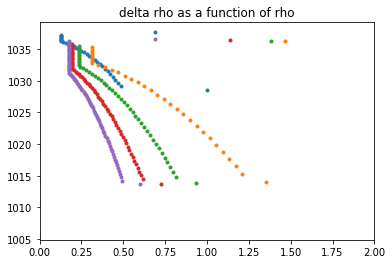

In [39]:
nk = 35
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.5
drho = 8
rho_4 = 1038
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 35
rho_1 = 999.5
rho_2 = 1013.4
rho_3 = 1013.5
drho = 20
rho_4 = 1037
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 51
rho_1 = 999.5
rho_2 = 1013.4
rho_3 = 1013.5
drho = 20
rho_4 = 1037
drho_min = 0.00586125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 67
rho_1 = 999.5
rho_2 = 1013.4
rho_3 = 1013.5
drho = 20
rho_4 = 1037
drho_min = 0.0048828125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 83
rho_1 = 999.5
rho_2 = 1013.4
rho_3 = 1013.5
drho = 20
rho_4 = 1037
drho_min = 0.00439453125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

# nk = 51
# rho_1 = 999.5
# rho_2 = 1013.4
# rho_3 = 1013.5
# drho = 16
# rho_4 = 1037
# drho_min = 0.00390625

# rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

# nk = 35
# rho_1 = 999.5
# rho_2 = 1010.5
# rho_3 = 1010.75
# drho = 8
# rho_4 = 1038
# drho_min = 0.0078125

# rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

# nk = 83
# rho_1 = 999.5
# rho_2 = 1028
# rho_3 = 1028.125
# drho = 8
# rho_4 = 1038.1
# drho_min = 0.00586125

# rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

In [38]:
rho_target

array([ 999.5    , 1013.4    , 1014.     , 1014.49375, 1014.98125,
       1015.4625 , 1015.9375 , 1016.40625, 1016.86875, 1017.325  ,
       1017.775  , 1018.21875, 1018.65625, 1019.0875 , 1019.5125 ,
       1019.93125, 1020.34375, 1020.75   , 1021.15   , 1021.54375,
       1021.93125, 1022.3125 , 1022.6875 , 1023.05625, 1023.41875,
       1023.775  , 1024.125  , 1024.46875, 1024.80625, 1025.1375 ,
       1025.4625 , 1025.78125, 1026.09375, 1026.4    , 1026.7    ,
       1026.99375, 1027.28125, 1027.5625 , 1027.8375 , 1028.10625,
       1028.36875, 1028.625  , 1028.875  , 1029.11875, 1029.35625,
       1029.5875 , 1029.8125 , 1030.03125, 1030.24375, 1030.45   ,
       1030.65   , 1030.84375, 1031.03125, 1031.2125 , 1031.3875 ,
       1031.55625, 1031.71875, 1031.875  , 1032.03125, 1032.1875 ,
       1032.34375, 1032.5    , 1032.65625, 1032.8125 , 1032.96875,
       1033.125  , 1033.28125, 1033.4375 , 1033.59375, 1033.75   ,
       1033.90625, 1034.0625 , 1034.21875, 1034.375  , 1034.53